In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [3, 7, 13, 21, 31, 43, 57, 73, 91, 111]

regr = LinearRegression().fit(x,y)
regr.score(x,y)

predict = np.array([[6]])

print ("Prediksi")
print ("Input =", predict)
print ("Output =", regr.predict(predict))

Prediksi
Input = [[6]]
Output = [51.]


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np

# Input data
x = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [3, 7, 13, 21, 31, 43, 57, 73, 91, 111]

# Prediction input
predict = np.array([[12]])

# Transforming the features to polynomial features
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x)
predict_ = poly.fit_transform(predict)

# Fitting the model
regr = linear_model.LinearRegression()
regr.fit(x_, y)

# Printing the prediction
print("Prediksi")
print("Input =", predict)
print("Output =", regr.predict(predict_))

Prediksi
Input = [[12]]
Output = [157.]


Mean Squared Error (Linear): 25.00
Mean Squared Error (Polynomial Degree 2): 0.00


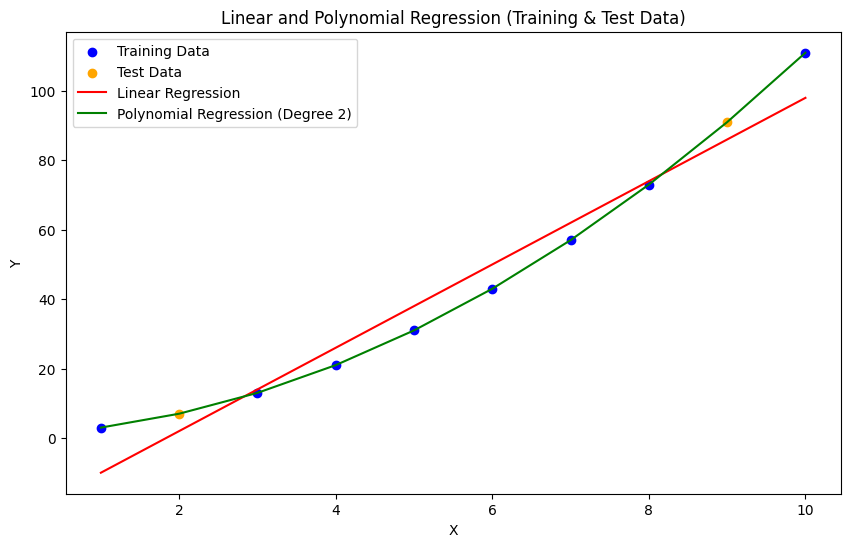

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Membuat dataset (hanya nilai positif untuk X)
np.random.seed(0)
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
Y = [3, 7, 13, 21, 31, 43, 57, 73, 91, 111]

# Membagi dataset menjadi data latih dan uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat model regresi linear
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Membuat model regresi polinomial derajat 2
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_train_poly_2, Y_train)

# Membuat prediksi untuk keseluruhan dataset
X_sorted = np.sort(X, axis=0)  # Sorting X for smooth plotting
Y_pred_linear_all = linear_model.predict(X_sorted)
Y_pred_poly_2_all = poly_model_2.predict(poly_features_2.transform(X_sorted))

# Evaluasi model
mse_linear = mean_squared_error(Y_test, linear_model.predict(X_test))
mse_poly_2 = mean_squared_error(Y_test, poly_model_2.predict(poly_features_2.transform(X_test)))

print(f"Mean Squared Error (Linear): {mse_linear:.2f}")
print(f"Mean Squared Error (Polynomial Degree 2): {mse_poly_2:.2f}")

# Plot hasil regresi untuk seluruh dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', label='Training Data')  # Training data
plt.scatter(X_test, Y_test, color='orange', label='Test Data')  # Test data
plt.plot(X_sorted, Y_pred_linear_all, color='red', label='Linear Regression')  # Linear regression line
plt.plot(X_sorted, Y_pred_poly_2_all, color='green', label='Polynomial Regression (Degree 2)')  # Polynomial regression line

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear and Polynomial Regression (Training & Test Data)')
plt.legend()
plt.show()
